<a href="https://colab.research.google.com/github/Dahuginn/4yr_animerecommend/blob/main/%5BThesis%5Dgraph_split_node2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install node2vec
!pip install stellargraph

In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import networkx as nx
import stellargraph as sg
from sklearn.model_selection import train_test_split
from stellargraph.data import EdgeSplitter
from sklearn.manifold import TSNE

from node2vec import Node2Vec

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/My Drive')
import pickle

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
fh = open("/content/gdrive/My Drive/4 year/3000graph.graphml", "rb")
graph = nx.read_graphml(fh)
nx.info(graph)

'Graph with 958 nodes and 96302 edges'

In [68]:
edge_splitter_test = EdgeSplitter(graph)
graph_test, examples_test, labels_test = edge_splitter_test.train_test_split(p=0.01, method="global")

print(nx.info(graph_test))

** Sampled 963 positive and 963 negative edges. **
Graph with 958 nodes and 95339 edges


In [69]:
edge_splitter_train = EdgeSplitter(graph_test, graph)
graph_train, examples, labels = edge_splitter_train.train_test_split(p=0.01, method="global")
examples_train, examples_model_selection, labels_train, labels_model_selection = train_test_split(examples, labels, train_size=0.75, test_size=0.25)

print(nx.info(graph_train))

** Sampled 953 positive and 953 negative edges. **
Graph with 958 nodes and 94386 edges


In [70]:
pd.DataFrame(
    [("Training", len(examples_train), "Train classifier"),
     ("Model selection", len(examples_model_selection), "Choose the best model"),
     ("Test", len(examples_test), "Determine the best classifier score")],
     columns=("Split", "Num ", "Purpose")).set_index("Split")

,Num,Purpose
Split,,
Training,1429,Train classifier
Model selection,477,Choose the best model
Test,1926,Determine the best classifier score


In [71]:
node2vec = Node2Vec(graph_train, dimensions=128, walk_length=80, num_walks=10, weight_key='weight')
model = node2vec.fit(window=10, min_count=1)

Computing transition probabilities:   0%|          | 0/958 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [06:42<00:00, 40.21s/it]


In [72]:
pickle.dump(model, open('/content/gdrive/My Drive/4 year/node2vec3000.sav', 'wb'))

In [73]:
loaded_model = pickle.load(open('/content/gdrive/My Drive/4 year/node2vec3000.sav', 'rb'))

In [74]:
ne = loaded_model.wv.vectors
tsne2 = TSNE(n_components=2, random_state=42)
ne_2d = tsne2.fit_transform(ne)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


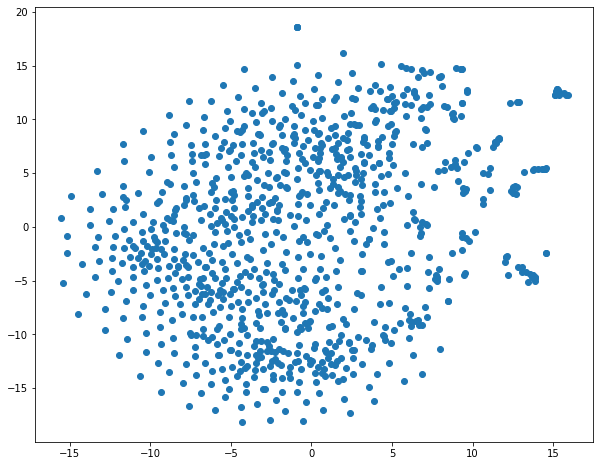

In [75]:
plt.figure(figsize=(10, 8))
plt.scatter(ne_2d[:, 0], ne_2d[:, 1])
plt.show()

In [76]:
nodes = []
for i in graph.nodes():
  nodes.append(i)

In [77]:
names_available = np.unique(nodes)

In [78]:
print(names_available[306], model.wv.get_vector(names_available[306]))

Gintama: Shinyaku Benizakura-hen Special Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen [-0.02214222 -0.05660239 -0.13423812 -0.01405583  0.0984685  -0.04685622
  0.0722035   0.03590965  0.01627081 -0.02367628 -0.12674116  0.06390458
  0.08498214  0.01656594  0.02783336  0.00486731 -0.16872235 -0.02929499
 -0.03026275 -0.04324786  0.01997879 -0.01192847 -0.04465505 -0.05768551
 -0.00517913 -0.03247595  0.15342547 -0.02861775 -0.1633455   0.08645856
 -0.22054978  0.0529793  -0.07017989 -0.0477176  -0.02415223  0.10432544
 -0.07512274 -0.04387084  0.13244331  0.10680951  0.13263002 -0.02742493
  0.02519056  0.10466679 -0.0058724   0.05724992 -0.23752779  0.13225602
  0.0188337  -0.16578427 -0.01000072  0.00824634  0.02525161  0.04859854
  0.0578669   0.07783753 -0.10643199 -0.01242816  0.04973581  0.07775387
 -0.07436718  0.07232762  0.07428335  0.01412569  0.02554373 -0.04756058
 -0.02358992  0.017469    0.03998738  0.09142942  0.08922892 -0.07873756
  0.15373258  0.063107

In [79]:
for node, score in model.wv.most_similar('Gintama: Shinyaku Benizakura-hen Special Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen'):
  print(node, score)

Mirai Shounen Conan TV Adventure, Drama, Sci-Fi 0.9303034543991089
Hikaru no Go: New Year Special Special Comedy, Game, Shounen, Supernatural 0.9174271821975708
Sayonara Zetsubou Sensei Special Special Comedy, Mystery, Parody 0.9172375202178955
Oni Chichi: Re-birth OVA Hentai 0.9119675755500793
Oni Chichi: Re-born OVA Hentai 0.9118938446044922
Rain Town ONA Drama 0.9047666192054749
Chi&#039;s Sweet Home: Atarashii Ouchi TV Comedy, Kids, Slice of Life 0.9030340909957886
Iria: Zeiram The Animation OVA Action, Adventure, Sci-Fi, Space 0.8996899127960205
Macross F: Close Encounter - Deculture Edition Special Action, Mecha, Military, Music, Sci-Fi, Space 0.8995567560195923
Tales of Eternia The Animation TV Adventure, Comedy, Fantasy, Romance, Shounen 0.8967748284339905


In [80]:
def operator_hadamard(u, v):
    return u * v


def operator_l1(u, v):
    return np.abs(u - v)


def operator_l2(u, v):
    return (u - v) ** 2


def operator_avg(u, v):
    return (u + v) / 2.0

In [81]:
def get_vectorized(link_features, model):
  s = []
  d = []
  for src, dst in link_features:
    s.append(model.wv[src])
    d.append(model.wv[dst])
  return np.array(s), np.array(d)

In [82]:
def apply_operator(s, d, op):
  transformed = op(s, d)
  return transformed

In [83]:
def do_classification(f_train, l_train, op, model):
  s, d = get_vectorized(f_train, model)
  X_train = op(s, d)
  y_train = l_train

  lr_clf = LogisticRegressionCV(Cs=10, cv=10, scoring="roc_auc", max_iter=1000)
  pipa = Pipeline(steps=[("sc", StandardScaler()), ("clf", lr_clf)])
  pipa.fit(X_train, y_train)

  return pipa

In [84]:
def evaluate(classif, f_test, l_test, op, model):
  s_test, d_test = get_vectorized(f_test, model)
  testing_labels = apply_operator(s_test, d_test, op)
  predicted = classif.predict_proba(testing_labels)
  positive_column = list(classif.classes_).index(1)
  return roc_auc_score(l_test, predicted[:, positive_column])

In [85]:
def run_prediction(op, model):
  clf = do_classification(examples_train, labels_train, op, model)
  score = evaluate(clf, examples_model_selection, labels_model_selection, op, model)
  return {
        "classifier": clf,
        "binary_operator": op,
        "score": score,
    }

In [86]:
binary_operators = [operator_hadamard, operator_l1, operator_l2, operator_avg]

In [87]:
binary_operators = [operator_hadamard, operator_l1, operator_l2, operator_avg]
results = [run_prediction(op, model) for op in binary_operators]
best_result = max(results, key=lambda result: result["score"])

print(f"Best result from '{best_result['binary_operator'].__name__}'")

pd.DataFrame(
    [(result["binary_operator"].__name__, result["score"]) for result in results],
    columns=("name", "ROC AUC score"),
).set_index("name")

Best result from 'operator_avg'


,ROC AUC score
name,
operator_hadamard,0.845452
operator_l1,0.746739
operator_l2,0.742010
operator_avg,0.883619


In [89]:
node2vec_test = Node2Vec(graph_test, dimensions=128, walk_length=80, num_walks=10, weight_key='weight')
model = node2vec_test.fit(window=10, min_count=1)

Computing transition probabilities:   0%|          | 0/958 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [06:03<00:00, 36.34s/it]


In [92]:
model_test = node2vec_test.fit(window=10, min_count=1)

In [93]:
test_score = evaluate(
    best_result["classifier"],
    examples_test,
    labels_test,
    best_result["binary_operator"],
    model_test,
)
print(f"ROC AUC score on test set using '{best_result['binary_operator'].__name__}': {test_score}")

ROC AUC score on test set using 'operator_avg': 0.777899627871969


In [94]:
src_test, dst_test = get_vectorized(examples_test, model_test)
test = apply_operator(src_test, dst_test, operator_hadamard)

In [95]:
embeddings = model_test.wv.vectors
tsne2 = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne2.fit_transform(test)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


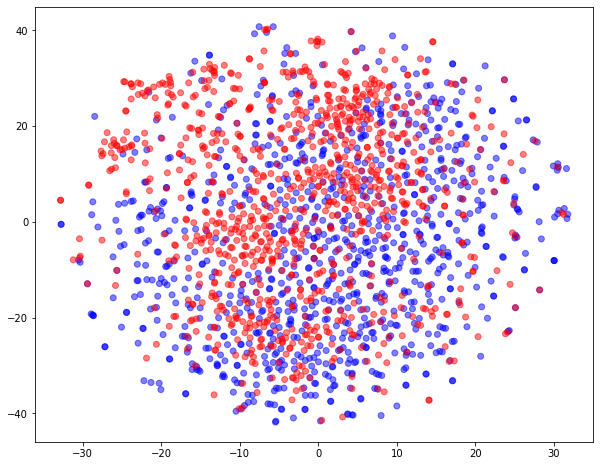

In [96]:
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=np.where(labels_test == 1, "b", "r"), alpha=0.5)
plt.show()